In [2]:
# Clear all
    rm(list=ls())

In [3]:
# Reads selected CSV file and stores under a dataframe name
    CIBC_Data <- read.csv("CIBC_Data.csv", header=TRUE)
  
  # Lists first 6 rows
    head(CIBC_Data)
  
  # Indicates the number of observations and number of variables
    dim(CIBC_Data)

,Year,Subsector,Province,Occupational.Group,QTR,All.Employees...Total,All.Employees...M,Male,All.Employees...F,Female,⋯,Aboriginal.Peoples...M,Aboriginal.Peoples...F,Persons.with.Disabilities...Total,PwD,Persons.with.Disabilities...M,Persons.with.Disabilities...F,Members.of.Visible.Minorities...Total,RP,Members.of.Visible.Minorities...M,Members.of.Visible.Minorities...F
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2017,Depository Credit Intermediation,Ontario,Senior Managers,4,1,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,2017,Depository Credit Intermediation,Ontario,Senior Managers,3,4,3,1,1,1,⋯,0,0,0,0,0,0,1,1,1,0
3,2017,Depository Credit Intermediation,Ontario,Senior Managers,2,8,6,1,2,1,⋯,0,0,2,1,1,1,1,1,1,0
4,2017,Depository Credit Intermediation,Ontario,Senior Managers,1,215,149,1,66,1,⋯,1,0,20,1,16,4,29,1,21,8
5,2017,Depository Credit Intermediation,Ontario,Middle and Other Managers,4,5,3,1,2,1,⋯,0,0,1,1,1,0,2,1,1,1
6,2017,Depository Credit Intermediation,Ontario,Middle and Other Managers,3,14,12,1,2,1,⋯,0,0,0,0,0,0,3,1,3,0


[1] 3408   23

In [4]:
    library(ggplot2)
    library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
## Data Cleaning

  # Removes missing values
    s = sum(is.na(CIBC_Data))
  
  # New dataset after removing missing values is CIBC. Done this way to avoid overwriting original file
    CIBC <- na.omit(CIBC_Data)
    
  # Renames specific column by stating the column number
    names(CIBC)[1] <- "Year"  

In [6]:
head(CIBC)

  # QTR changed to numeric type for correlation calculations
    CIBC$QTR <- as.numeric(CIBC$QTR)
    is.numeric(CIBC$QTR)
    summary(CIBC$QTR)

    CIBC$All.Employees...Total <- as.numeric(CIBC$All.Employees...Total)
    is.numeric(CIBC$All.Employees...Total)
    summary(CIBC$All.Employees...Total)
    
    CIBC$Male <- as.numeric(CIBC$Male)
    is.numeric(CIBC$Male)
    summary(CIBC$Male)
    
    CIBC$Female <- as.numeric(CIBC$Female)
    is.numeric(CIBC$Female)
    summary(CIBC$Female)
    
    CIBC$Female_Dominated_Occupation <- as.numeric(CIBC$Female_Dominated_Occupation)
    is.numeric(CIBC$Female_Dominated_Occupation)
    summary(CIBC$Female_Dominated_Occupation)
    
    CIBC$Indigenous <- as.numeric(CIBC$Indigenous)
    is.numeric(CIBC$Indigenous)
    summary(CIBC$Indigenous)
    
    CIBC$PwD <- as.numeric(CIBC$PwD)
    is.numeric(CIBC$PwD)
    summary(CIBC$PwD)
    
    CIBC$RP <- as.numeric(CIBC$RP)
    is.numeric(CIBC$RP)
    summary(CIBC$RP)
    
    str(CIBC)


,Year,Subsector,Province,Occupational.Group,QTR,All.Employees...Total,All.Employees...M,Male,All.Employees...F,Female,⋯,Aboriginal.Peoples...M,Aboriginal.Peoples...F,Persons.with.Disabilities...Total,PwD,Persons.with.Disabilities...M,Persons.with.Disabilities...F,Members.of.Visible.Minorities...Total,RP,Members.of.Visible.Minorities...M,Members.of.Visible.Minorities...F
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2017,Depository Credit Intermediation,Ontario,Senior Managers,4,1,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,2017,Depository Credit Intermediation,Ontario,Senior Managers,3,4,3,1,1,1,⋯,0,0,0,0,0,0,1,1,1,0
3,2017,Depository Credit Intermediation,Ontario,Senior Managers,2,8,6,1,2,1,⋯,0,0,2,1,1,1,1,1,1,0
4,2017,Depository Credit Intermediation,Ontario,Senior Managers,1,215,149,1,66,1,⋯,1,0,20,1,16,4,29,1,21,8
5,2017,Depository Credit Intermediation,Ontario,Middle and Other Managers,4,5,3,1,2,1,⋯,0,0,1,1,1,0,2,1,1,1
6,2017,Depository Credit Intermediation,Ontario,Middle and Other Managers,3,14,12,1,2,1,⋯,0,0,0,0,0,0,3,1,3,0


[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.75    2.50    2.50    3.25    4.00 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    2.00   68.55   13.00 9408.00 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   0.505   1.000   1.000 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.5346  1.0000  1.0000 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3879  1.0000  1.0000 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1802  0.0000  1.0000 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.238   0.000   1.000 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3442  1.0000  1.0000 

'data.frame':	3408 obs. of  23 variables:
 $ Year                                 : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ Subsector                            : Factor w/ 1 level "Depository Credit Intermediation": 1 1 1 1 1 1 1 1 1 1 ...
 $ Province                             : Factor w/ 10 levels "Alberta","British Columbia",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Occupational.Group                   : Factor w/ 12 levels "Administrative and Senior Clerical Personnel",..: 9 9 9 9 4 4 4 4 6 6 ...
 $ QTR                                  : num  4 3 2 1 4 3 2 1 4 3 ...
 $ All.Employees...Total                : num  1 4 8 215 5 ...
 $ All.Employees...M                    : int  1 3 6 149 3 12 1016 1242 5 14 ...
 $ Male                                 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ All.Employees...F                    : int  0 1 2 66 2 2 578 1354 0 6 ...
 $ Female                               : num  0 1 1 1 1 1 1 1 0 1 ...
 $ Female_Dominated_Occupation          : num  

In [8]:
# Correlation Matrix
    Corr_Matrix <- CIBC[, c(5,10,13,17)]
  # Prints the first 6 rows
    head(Corr_Matrix, 6)

    res <- cor(Corr_Matrix)
  # Rounds to 2 decimal places
    round(res, 2)

,QTR,Female,Indigenous,PwD
,<dbl>,<dbl>,<dbl>,<dbl>
1,4,0,0,0
2,3,1,0,0
3,2,1,0,1
4,1,1,1,1
5,4,1,0,1
6,3,1,0,0


,QTR,Female,Indigenous,PwD
QTR,1.00,-0.12,-0.23,-0.19
Female,-0.12,1.00,0.42,0.49
Indigenous,-0.23,0.42,1.00,0.64
PwD,-0.19,0.49,0.64,1.00


In [11]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


corrplot 0.84 loaded


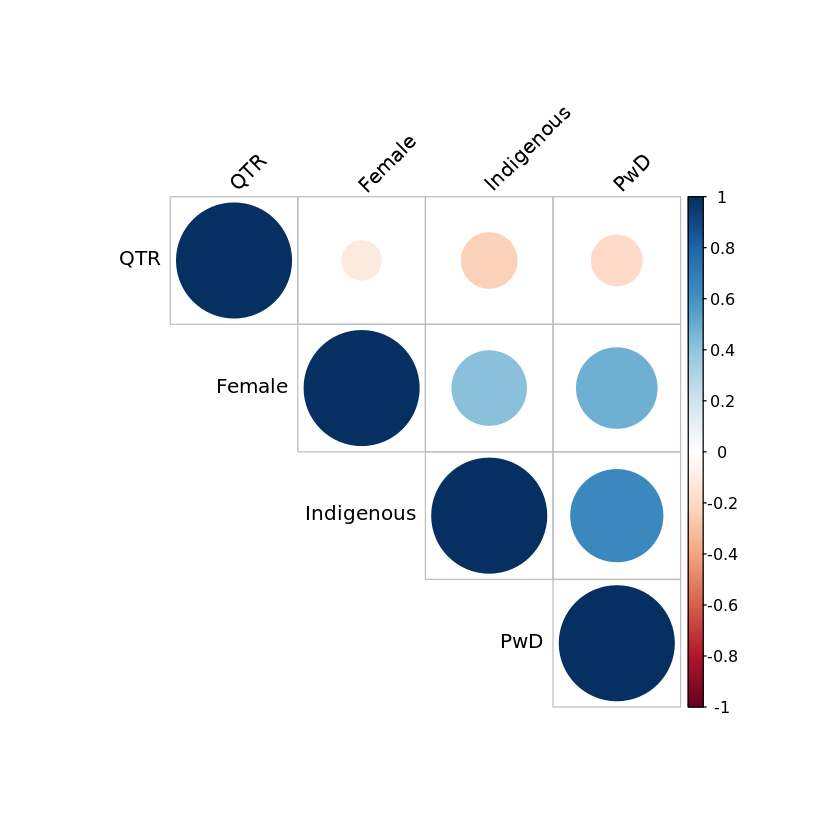

In [12]:
  # Correlogram Visual
    library(corrplot)
    corrplot(res, type = "upper", order = "hclust", 
           tl.col = "black", tl.srt = 45)

In [13]:
# QTR changed back to factor type
    CIBC$QTR = factor(CIBC$QTR, levels = c("1", "2", "3", "4"), ordered = TRUE) 
    is.factor(CIBC$QTR)
    summary(CIBC$QTR)

[1] TRUE

1   2   3   4 
852 852 852 852

In [14]:
install.packages("ggpubr")

also installing the dependencies ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [16]:
install.packages("ggthemes")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [17]:
install.packages("GGally")

also installing the dependency ‘reshape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [18]:
install.packages("vcd")

also installing the dependency ‘lmtest’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


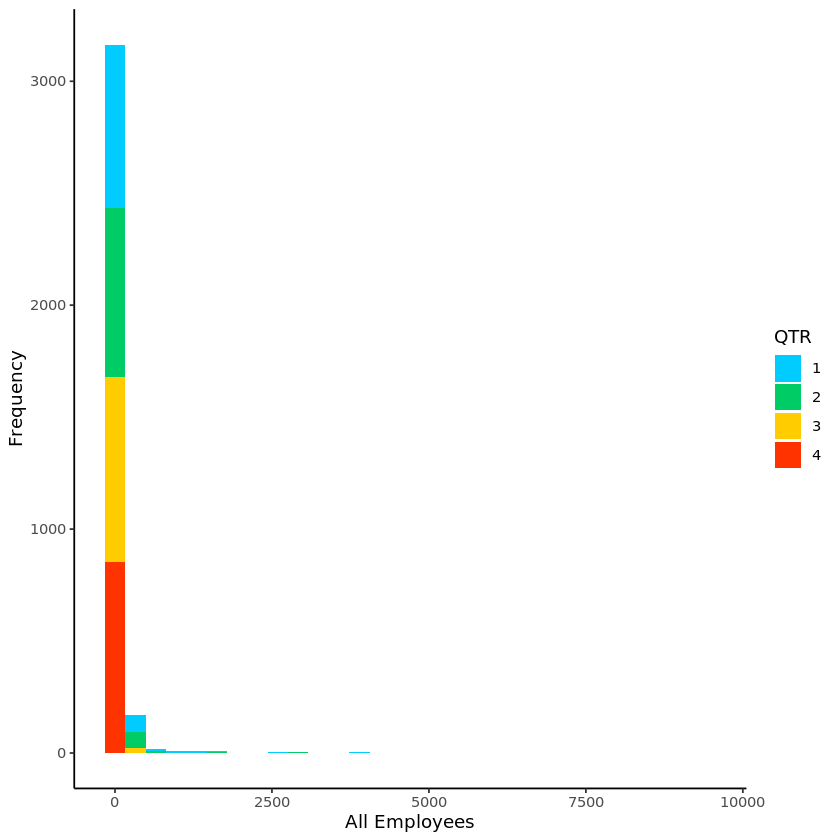

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


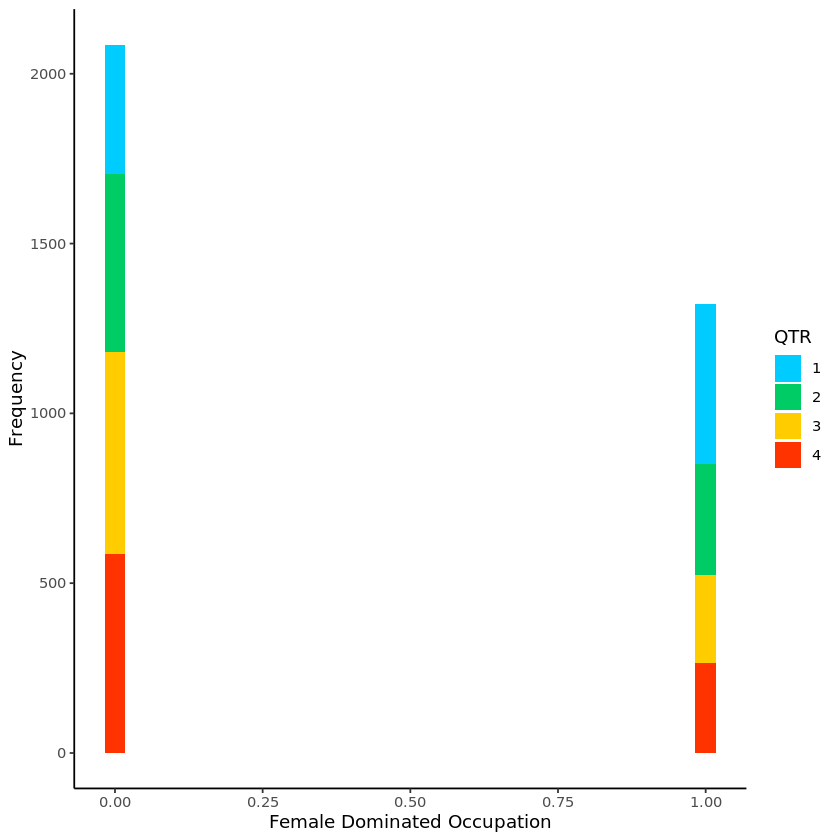

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


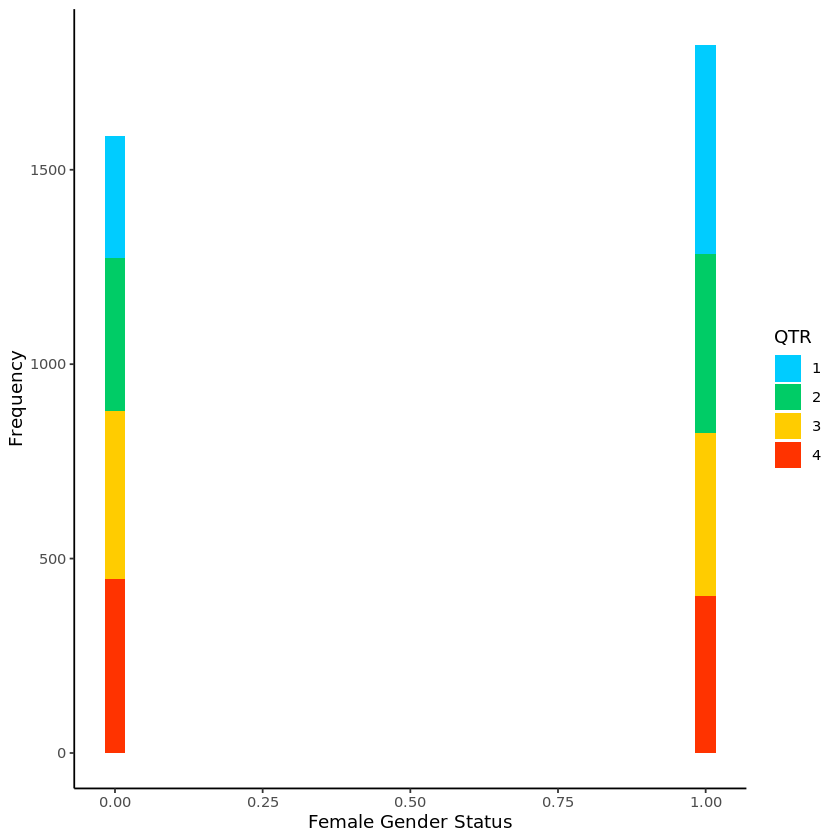

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


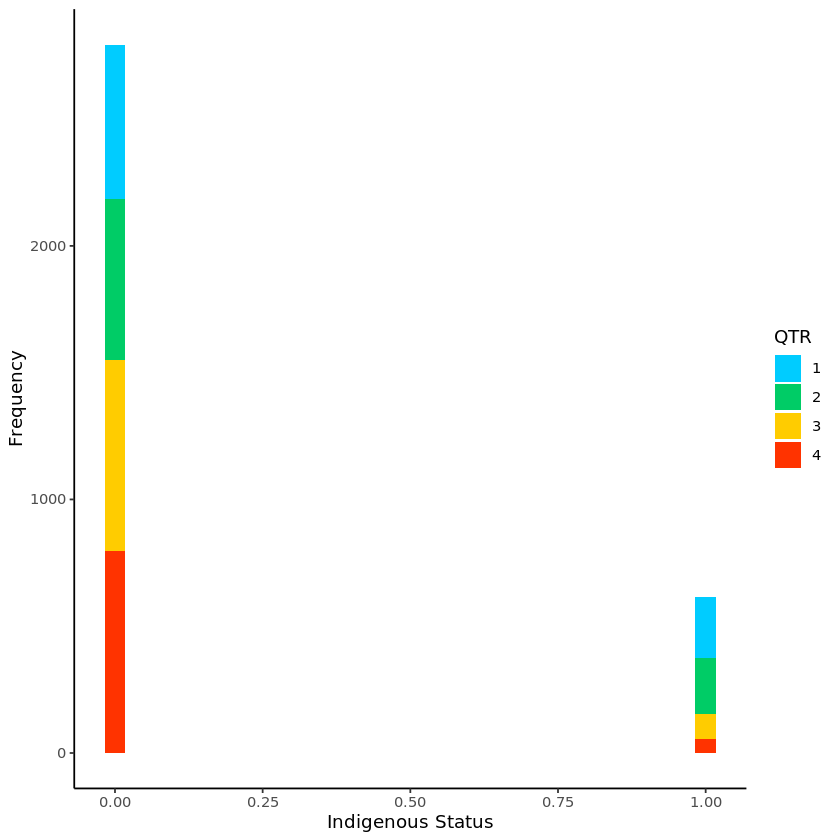

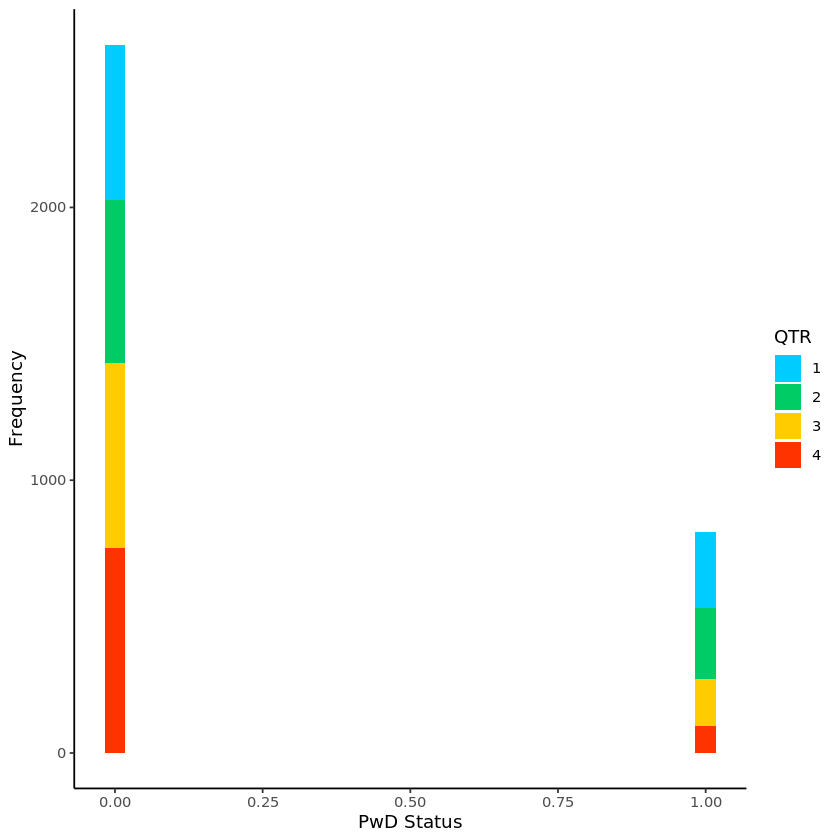

In [21]:
# Histograms
    ggplot(CIBC, aes(All.Employees...Total, fill = QTR)) +
      geom_histogram() + scale_fill_manual(values=c("#00CCFF", "#00CC66", "#FFCC00", "#FF3300")) + 
      labs(x = 'All Employees', y = 'Frequency') + 
      theme_classic()
  
    ggplot(CIBC, aes(Female_Dominated_Occupation, fill = QTR)) +
      geom_histogram() + scale_fill_manual(values=c("#00CCFF", "#00CC66", "#FFCC00", "#FF3300")) + 
      labs(x = 'Female Dominated Occupation', y = 'Frequency') + 
      theme_classic()
    
    ggplot(CIBC, aes(Female, fill = QTR)) +
      geom_histogram() + scale_fill_manual(values=c("#00CCFF", "#00CC66", "#FFCC00", "#FF3300")) + 
      labs(x = 'Female Gender Status', y = 'Frequency') + 
      theme_classic()
    
    ggplot(CIBC, aes(Indigenous, fill = QTR)) +
      geom_histogram() + scale_fill_manual(values=c("#00CCFF", "#00CC66", "#FFCC00", "#FF3300")) + 
      labs(x = 'Indigenous Status', y = 'Frequency') + 
      theme_classic()
    
    ggplot(CIBC, aes(PwD, fill = QTR)) +
      geom_histogram() + scale_fill_manual(values=c("#00CCFF", "#00CC66", "#FFCC00", "#FF3300")) + 
      labs(x = 'PwD Status', y = 'Frequency') + 
      theme_classic()

In [84]:
## Creating Ordinal Factor Variables
    
    # Ordering the dependent variable: QTR
      CIBC$QTR = factor(CIBC$QTR, levels = c("1", "2", "3", "4"), ordered = TRUE) 
      
    # Ordering the independent variables  
      CIBC$Female_Dominated_Occupation = factor(CIBC$Female_Dominated_Occupation, levels = c("0", "1"), ordered = TRUE)
      CIBC$Female = factor(CIBC$Female, levels = c("0", "1"), ordered = TRUE)
      CIBC$Male = factor(CIBC$Male, levels = c("0", "1"), ordered = TRUE)
      CIBC$Indigenous = factor(CIBC$Indigenous, levels = c("0", "1"), ordered = TRUE)
      CIBC$PwD = factor(CIBC$PwD, levels = c("0", "1"), ordered = TRUE)
    
  # Summary statistics
    summary(CIBC)
  
  # Indicates the number of observations and number of variables
    dim(CIBC)
  
  # Class of object, which is dataframe
    class(CIBC)
  
  # Lists variable types
    str(CIBC)

      Year                                 Subsector                Province   
 Min.   :2010   Depository Credit Intermediation:3408   Ontario         : 368  
 1st Qu.:2011                                           Saskatchewan    : 356  
 Median :2013                                           Alberta         : 352  
 Mean   :2013                                           British Columbia: 352  
 3rd Qu.:2015                                           Manitoba        : 352  
 Max.   :2017                                           New Brunswick   : 352  
                                                        (Other)         :1276  
                                    Occupational.Group QTR    
 Administrative and Senior Clerical Personnel: 308     1:852  
 Clerical Personnel                          : 308     2:852  
 Intermediate Sales and Service Personnel    : 308     3:852  
 Middle and Other Managers                   : 308     4:852  
 Professionals                               

[1] 3408   23

[1] "data.frame"

'data.frame':	3408 obs. of  23 variables:
 $ Year                                 : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ Subsector                            : Factor w/ 1 level "Depository Credit Intermediation": 1 1 1 1 1 1 1 1 1 1 ...
 $ Province                             : Factor w/ 10 levels "Alberta","British Columbia",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Occupational.Group                   : Factor w/ 12 levels "Administrative and Senior Clerical Personnel",..: 9 9 9 9 4 4 4 4 6 6 ...
 $ QTR                                  : Ord.factor w/ 4 levels "1"<"2"<"3"<"4": 4 3 2 1 4 3 2 1 4 3 ...
 $ All.Employees...Total                : int  1 4 8 215 5 14 1594 2596 5 20 ...
 $ All.Employees...M                    : int  1 3 6 149 3 12 1016 1242 5 14 ...
 $ Male                                 : Ord.factor w/ 2 levels "0"<"1": 2 2 2 2 2 2 2 2 2 2 ...
 $ All.Employees...F                    : int  0 1 2 66 2 2 578 1354 0 6 ...
 $ Female                             

In [25]:
# Frequency Tables
    table(CIBC$QTR, CIBC$Female_Dominated_Occupation)
    table(CIBC$QTR, CIBC$Female)
    table(CIBC$QTR, CIBC$Male)
    table(CIBC$QTR, CIBC$Indigenous)
    table(CIBC$QTR, CIBC$PwD)

   
      0   1
  1 382 470
  2 524 328
  3 593 259
  4 587 265

   
      0   1
  1 313 539
  2 393 459
  3 433 419
  4 447 405

   
      0   1
  1 361 491
  2 427 425
  3 470 382
  4 429 423

   
      0   1
  1 611 241
  2 632 220
  3 753  99
  4 798  54

   
      0   1
  1 571 281
  2 595 257
  3 678 174
  4 753  99

In [45]:
install.packages("car")

Warning message:
“dependency ‘pbkrtest’ is not available”Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [47]:
## Ordinal Logit Model 1
      library(MASS)
    
      logmodel <- polr(QTR ~ Female + Female_Dominated_Occupation + Indigenous + PwD, data = CIBC, Hess = TRUE)
      summary(logmodel)
    
    # Calculates p-values for estimated coefficients and intercepts to determine statistical significance
      summary_table <- coef(summary(logmodel))
      pval <- pnorm(abs(summary_table[, "t value"]), lower.tail = FALSE) * 2
    
      summary_table <- cbind(summary_table, "p value" = round(pval,3))
      summary_table

Call:
polr(formula = QTR ~ Female + Female_Dominated_Occupation + Indigenous + 
    PwD, data = CIBC, Hess = TRUE)

Coefficients:
                                Value Std. Error t value
Female.L                       0.3649    0.06893   5.293
Female_Dominated_Occupation.L -0.5241    0.06631  -7.904
Indigenous.L                  -0.5582    0.07548  -7.396
PwD.L                         -0.2416    0.07093  -3.406

Intercepts:
    Value    Std. Error t value 
1|2  -0.7219   0.0493   -14.6343
2|3   0.4468   0.0481     9.2898
3|4   1.6025   0.0546    29.3494

Residual Deviance: 9192.57 
AIC: 9206.57 

,Value,Std. Error,t value,p value
Female.L,0.3648910,0.06893354,5.293373,0.000
Female_Dominated_Occupation.L,-0.5240935,0.06630929,-7.903771,0.000
Indigenous.L,-0.5582375,0.07547993,-7.395841,0.000
PwD.L,-0.2415649,0.07093344,-3.405515,0.001
1|2,-0.7219262,0.04933118,-14.634278,0.000
2|3,0.4467556,0.04809092,9.289812,0.000
3|4,1.6024618,0.05459956,29.349355,0.000


In [30]:
install.packages("effects")

also installing the dependency ‘survey’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done



Female effect (probability) for 1
Female
        0         1 
0.2913155 0.1970180 

Female effect (probability) for 2
Female
        0         1 
0.2781519 0.2441667 

Female effect (probability) for 3
Female
        0         1 
0.2382715 0.2737251 

Female effect (probability) for 4
Female
        0         1 
0.1922611 0.2850902 

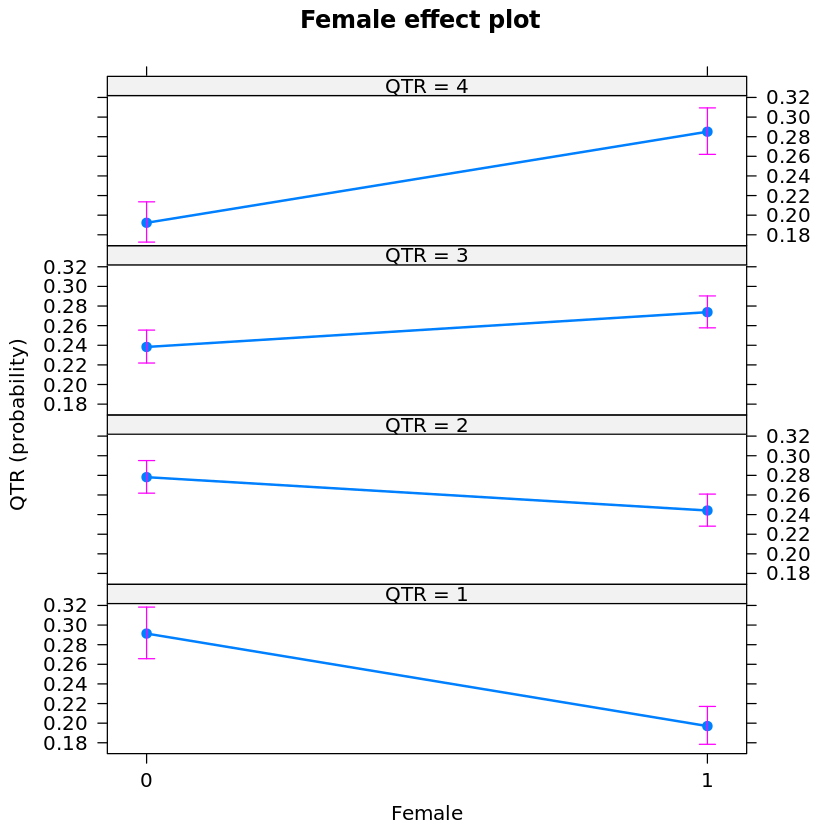

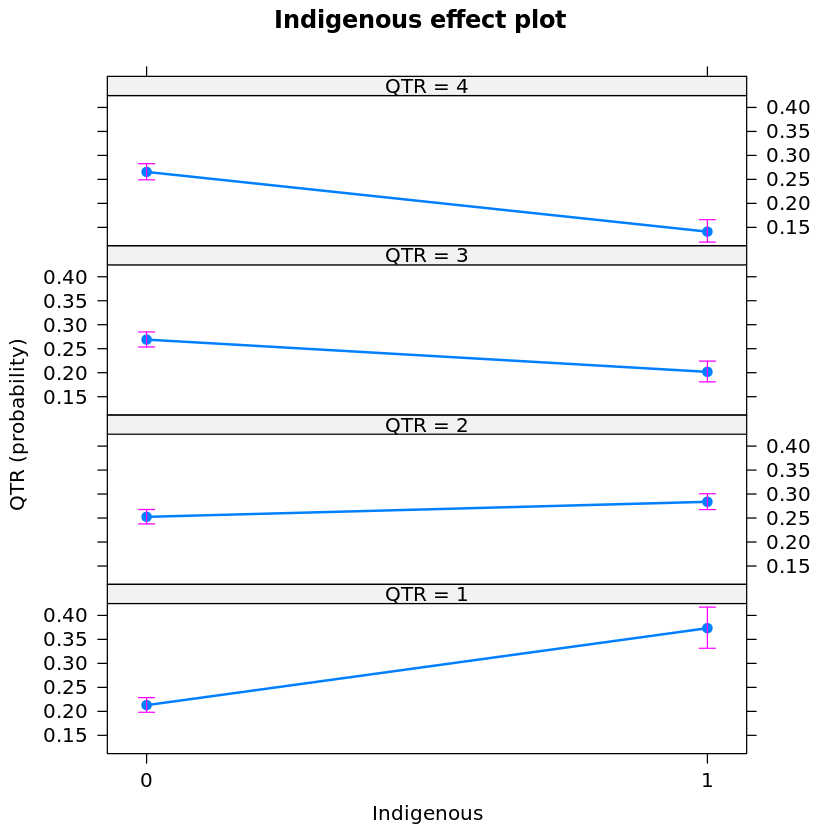

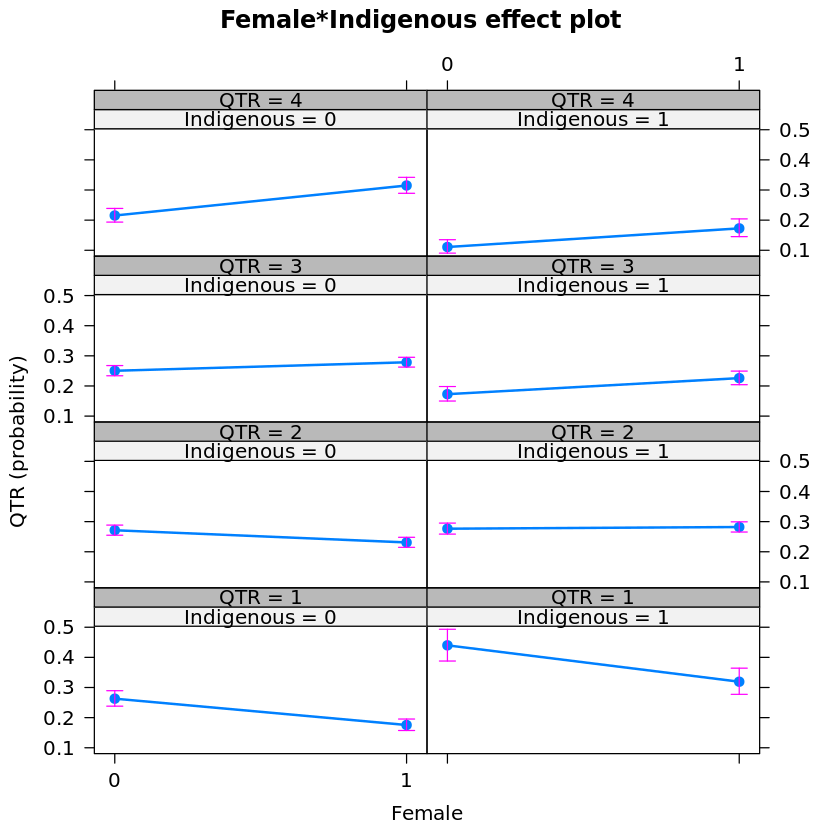

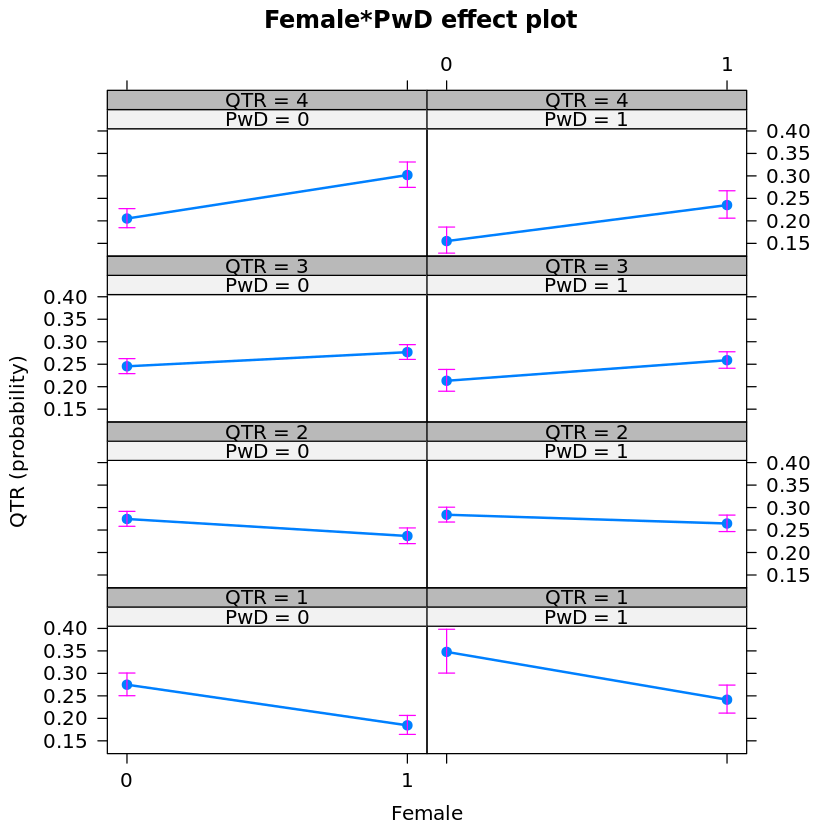

In [48]:
## Visuals to alternatively interpret regression results rather than observing the log odds ratio.
      
      library("effects")
      Effect(focal.predictors = "Female",logmodel)
      
      # Individual effect of Female gender on achieving a specific salary QTR
        plot(Effect(focal.predictors = "Female",logmodel))
      
      # Individual effect of Indigenous background on achieving a specific salary QTR
        plot(Effect(focal.predictors = "Indigenous",logmodel))
      
      # Joint effect of Indigenous background and Female gender on achieving a specific salary QTR
        plot(Effect(focal.predictors = c("Female", "Indigenous"),logmodel))
      
      # Joint effect of Persons with Disability (PwD) status and Female gender on achieving a specific salary QTR
        plot(Effect(focal.predictors = c("Female", "PwD"),logmodel))

In [49]:
## Ordinal Logit Model 2
    library(MASS)
    
    logmodel2 <- polr(QTR ~ Female_Dominated_Occupation + Male + Female + Indigenous + PwD, data = CIBC, Hess = TRUE)
    summary(logmodel2)
    
    # Calculates p-values for estimated coefficients and intercepts to determine statistical significance
      summary_table <- coef(summary(logmodel2))
      pval <- pnorm(abs(summary_table[, "t value"]), lower.tail = FALSE) * 2
    
      summary_table <- cbind(summary_table, "p value" = round(pval,3))
      summary_table

Call:
polr(formula = QTR ~ Female_Dominated_Occupation + Male + Female + 
    Indigenous + PwD, data = CIBC, Hess = TRUE)

Coefficients:
                                Value Std. Error t value
Female_Dominated_Occupation.L -0.4896    0.06926  -7.069
Male.L                         0.1031    0.05942   1.736
Female.L                       0.2953    0.07973   3.704
Indigenous.L                  -0.5795    0.07650  -7.574
PwD.L                         -0.2615    0.07192  -3.636

Intercepts:
    Value    Std. Error t value 
1|2  -0.7153   0.0495   -14.4652
2|3   0.4530   0.0482     9.3971
3|4   1.6109   0.0548    29.3746

Residual Deviance: 9189.557 
AIC: 9205.557 

,Value,Std. Error,t value,p value
Female_Dominated_Occupation.L,-0.4895993,0.06925957,-7.069048,0.000
Male.L,0.1031371,0.05942427,1.735606,0.083
Female.L,0.2953400,0.07973143,3.704185,0.000
Indigenous.L,-0.5794647,0.07650257,-7.574447,0.000
PwD.L,-0.2614824,0.07191519,-3.635984,0.000
1|2,-0.7153453,0.04945286,-14.465194,0.000
2|3,0.4530120,0.04820787,9.397055,0.000
3|4,1.6108615,0.05483856,29.374613,0.000


In [50]:
## Ordinal Logit Model 3
    library(MASS)
  
    logmodel3 <- polr(QTR ~ Female + Indigenous + PwD, data = CIBC, Hess = TRUE)
    summary(logmodel3)
  
  # Calculates p-values for estimated coefficients and intercepts to determine statistical significance
    summary_table <- coef(summary(logmodel3))
    pval <- pnorm(abs(summary_table[, "t value"]), lower.tail = FALSE) * 2
  
    summary_table <- cbind(summary_table, "p value" = round(pval,3))
    summary_table

Call:
polr(formula = QTR ~ Female + Indigenous + PwD, data = CIBC, 
    Hess = TRUE)

Coefficients:
                 Value Std. Error t value
Female.L      0.005765    0.05161  0.1117
Indigenous.L -0.607577    0.07524 -8.0752
PwD.L        -0.219672    0.07079 -3.1030

Intercepts:
    Value    Std. Error t value 
1|2  -0.8005   0.0481   -16.6500
2|3   0.3490   0.0462     7.5569
3|4   1.4939   0.0524    28.5064

Residual Deviance: 9255.389 
AIC: 9267.389 

,Value,Std. Error,t value,p value
Female.L,0.005765449,0.05160908,0.1117138,0.911
Indigenous.L,-0.607576890,0.07523991,-8.0751944,0.000
PwD.L,-0.219672335,0.07079268,-3.1030374,0.002
1|2,-0.800480796,0.04807696,-16.6499871,0.000
2|3,0.348978742,0.04617992,7.5569361,0.000
3|4,1.493893020,0.05240558,28.5063754,0.000
